In [2]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [3]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [4]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [5]:
os.chdir("/mnt/lanlep2019/")

In [6]:
!pwd

/mnt/lanlep2019


# once

In [7]:
!pip install hyperopt


    100% |████████████████████████████████| 122kB 3.4MB/s ta 0:00:01
    100% |████████████████████████████████| 1.7MB 862kB/s  eta 0:00:01
    100% |████████████████████████████████| 829kB 1.7MB/s  eta 0:00:01
    100% |████████████████████████████████| 419kB 3.4MB/s  eta 0:00:01
  Running setup.py bdist_wheel for networkx ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/68/f8/29/b53346a112a07d30a5a84d53f19aeadaa1a474897c0423af91
  Running setup.py bdist_wheel for future ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/0c/61/d2/d6b7317325828fbb39ee6ad559dbe4664d0896da4721bf379e
Successfully built networkx future
You are using pip version 9.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [7]:
import lightgbm as lgb

In [8]:
import data
import config

In [9]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [10]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [11]:
traintest.num_dataset()

5

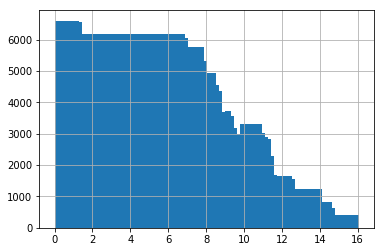

In [12]:
traintest.ydf.hist(bins=100);

In [13]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [14]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [15]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [16]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [17]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [18]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [19]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [20]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [21]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [22]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [23]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [24]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


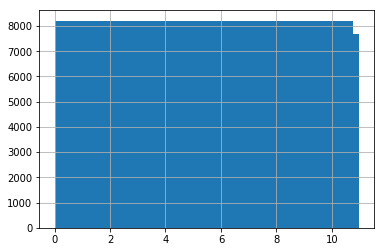

In [25]:
ydf.hist(bins=50);

In [26]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [27]:
from hyperopt import fmin, tpe, hp


In [28]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=100, early_stopping_rounds=100)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [29]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'mae',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [30]:
best_mae=1e10

In [31]:
def lgbcv(learning_rate, num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return r

In [32]:
space={
   'num_leaves': hp.uniform('num_leaves', 32,128 ),
    'reg_alpha':hp.loguniform('reg_alpha', np.log(0.01),np.log(10) ),
    'reg_lambda':hp.loguniform('reg_lambda', np.log(0.01),np.log(10) ),
    'max_depth':hp.uniform('max_depth',  3,10 ),
    'subsample':hp.uniform('subsample',  0.3,1 ),
    'colsample_bytree':hp.uniform('colsample_bytree',  0.3,1 ),
    'min_data_in_leaf':hp.loguniform('min_data_in_leaf', np.log(5),np.log(3000) ),
    'min_sum_hessian_in_leaf':hp.loguniform('min_sum_hessian_in_leaf', np.log(1e-3),np.log(3) ),
    'learning_rate':hp.loguniform('learning_rate', np.log(1e-3),np.log(0.01) ),
}

In [33]:
def objective(args):
    print args
    return lgbcv(**args)



In [34]:
best = fmin(fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100)
print best

{'num_leaves': 52.42205634828066, 'reg_alpha': 6.521256639754835, 'colsample_bytree': 0.7819596895006412, 'min_sum_hessian_in_leaf': 0.0010610753978446904, 'learning_rate': 0.0023963026847431497, 'subsample': 0.6268211469921845, 'reg_lambda': 0.03910868853371317, 'min_data_in_leaf': 379.1351012303825, 'max_depth': 9.008703352378191}
valid quake                                          
1                                                    
(379874, 450)                                        
(379874,)                                            
(29520, 450)                                         
(29520,)                                             
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.22993	valid_1's l1: 1.46548   
[200]	training's l1: 0.970822	valid_1's l1: 1.33711  
[300]	training's l1: 0.862709	valid_1's l1: 1.28596  
[400]	training's l1: 0.790956	valid_1's l1: 1.26564  
[500]	training's l1: 0.732084	valid_1's l1: 1.25549  
[600]	tr

(29520,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.0834	valid_1's l1: 1.36312                            
[200]	training's l1: 0.936706	valid_1's l1: 1.27665                          
[300]	training's l1: 0.869548	valid_1's l1: 1.25604                          
[400]	training's l1: 0.819406	valid_1's l1: 1.24489                          
[500]	training's l1: 0.769482	valid_1's l1: 1.23957                          
[600]	training's l1: 0.726951	valid_1's l1: 1.23786                          
[700]	training's l1: 0.692402	valid_1's l1: 1.23576                          
[800]	training's l1: 0.664897	valid_1's l1: 1.2351                           
Early stopping, best iteration is:                                           
[774]	training's l1: 0.671323	valid_1's l1: 1.23489
quake                                                                        
1           

(371633, 450)                                                                
(371633,)                                                                    
(37761, 450)                                                                 
(37761,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.06605	valid_1's l1: 1.5023                            
[200]	training's l1: 0.915456	valid_1's l1: 1.43733                          
[300]	training's l1: 0.851622	valid_1's l1: 1.44176                          
Early stopping, best iteration is:                                           
[246]	training's l1: 0.8814	valid_1's l1: 1.43651
quake                                                                        
14                                                                           
(1.43651033601927, 246)                                                      
valid quake   

(20192, 450)                                                                 
(20192,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.797	valid_1's l1: 1.86149                             
[200]	training's l1: 1.27491	valid_1's l1: 1.54945                           
[300]	training's l1: 1.11489	valid_1's l1: 1.51033                           
[400]	training's l1: 1.02866	valid_1's l1: 1.45713                           
[500]	training's l1: 0.973708	valid_1's l1: 1.41907                          
[600]	training's l1: 0.937688	valid_1's l1: 1.39483                          
[700]	training's l1: 0.908841	valid_1's l1: 1.38026                          
[800]	training's l1: 0.884397	valid_1's l1: 1.36999                          
[900]	training's l1: 0.864796	valid_1's l1: 1.36306                          
[1000]	training's l1: 0.84672	valid_1's l1: 1.35865             

quake                                                                        
1                                                                            
(1.2410657705168002, 418)                                                    
valid quake                                                                  
2                                                                            
(373099, 450)                                                                
(373099,)                                                                    
(36295, 450)                                                                 
(36295,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.03857	valid_1's l1: 1.37847                           
[200]	training's l1: 0.947176	valid_1's l1: 1.34576                          
[300]	training's l1: 0.888434	valid_1's l1: 1.34274             

1.160440188811535                                                            
{'num_leaves': 50.022687850507076, 'reg_alpha': 0.051418005689539324, 'colsample_bytree': 0.8146258250705849, 'min_sum_hessian_in_leaf': 0.5495922315091067, 'learning_rate': 0.006108489179921127, 'subsample': 0.8326135234078562, 'reg_lambda': 2.212400003085935, 'min_data_in_leaf': 48.165325703221235, 'max_depth': 8.414382777620762}
valid quake                                                                  
1                                                                            
(379874, 450)                                                                
(379874,)                                                                    
(29520, 450)                                                                 
(29520,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 0.921793	valid_1's l1

15                                                                           
(385215, 450)                                                                
(385215,)                                                                    
(24179, 450)                                                                 
(24179,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 0.93378	valid_1's l1: 1.14719                           
[200]	training's l1: 0.769443	valid_1's l1: 1.1269                           
[300]	training's l1: 0.667463	valid_1's l1: 1.12139                          
Early stopping, best iteration is:                                           
[297]	training's l1: 0.670849	valid_1's l1: 1.12002
quake                                                                        
15                                                                           
(1.120020137

valid quake                                                                  
10                                                                           
(380166, 450)                                                                
(380166,)                                                                    
(29228, 450)                                                                 
(29228,)                                                                     
Training until validation scores don't improve for 100 rounds.               
[100]	training's l1: 1.37295	valid_1's l1: 1.45112                           
[200]	training's l1: 0.981796	valid_1's l1: 1.1374                           
[300]	training's l1: 0.821252	valid_1's l1: 1.07338                          
[400]	training's l1: 0.719635	valid_1's l1: 1.05164                          
[500]	training's l1: 0.64636	valid_1's l1: 1.04144                           
[600]	training's l1: 0.593368	valid_1's l1: 1.03447             

quake                                                                          
6                                                                              
(1.3620432376256963, 251)                                                      
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.00033	valid_1's l1: 1.38246                             
[200]	training's l1: 0.915142	valid_1's l1: 1.36342                            
[300]	training's l1: 0.851512	valid_1's 

quake                                                                          
13                                                                             
(1.0620040651089666, 201)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.00059	valid_1's l1: 1.42727                             
[200]	training's l1: 0.912053	valid_1's l1: 1.43803                            
Early stopping, best iteration is:      

quake                                                                          
5                                                                              
(1.350427606722734, 159)                                                       
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.782947	valid_1's l1: 1.41587                            
[200]	training's l1: 0.636745	valid_1's l1: 1.40236                            
[300]	training's l1: 0.544833	valid_1's 

[800]	training's l1: 1.01268	valid_1's l1: 0.838712                            
[900]	training's l1: 1.00085	valid_1's l1: 0.835398                            
[1000]	training's l1: 0.984914	valid_1's l1: 0.832917                          
[1100]	training's l1: 0.969582	valid_1's l1: 0.832846                          
Early stopping, best iteration is:                                             
[1051]	training's l1: 0.976827	valid_1's l1: 0.831478
quake                                                                          
3                                                                              
(0.8314782101744184, 1051)                                                     
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                         

(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.55734	valid_1's l1: 1.50838                             
[200]	training's l1: 1.22316	valid_1's l1: 1.26647                             
[300]	training's l1: 1.12552	valid_1's l1: 1.16667                             
[400]	training's l1: 1.07848	valid_1's l1: 1.1136                              
[500]	training's l1: 1.05112	valid_1's l1: 1.08654                             
[600]	training's l1: 1.03118	valid_1's l1: 1.07368                             
[700]	training's l1: 1.01416	valid_1's l1: 1.06831                             
[800]	training's l1: 1.00015	valid_1's l

(1.3743701404090156, 785)                                                      
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.44753	valid_1's l1: 1.60433                             
[200]	training's l1: 1.11809	valid_1's l1: 1.50689                             
[300]	training's l1: 1.00712	valid_1's l1: 1.43148                             
[400]	training's l1: 0.951444	valid_1's l1: 1.38988                            
[500]	training's l1: 0.912413	valid_1's 

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.91327	valid_1's l1: 2.10708                              
[200]	training's l1: 1.39633	valid_1's l1: 1.63824                              
[300]	training's l1: 1.22694	valid_1's l1: 1.4718                               
[400]	training's l1: 1.14902	valid_1's l1: 1.40817                              
[500]	training's l1: 1.10146	valid_1's l1: 1.37877                              
[600]	training's l1: 1.07088	valid_1's l1: 1.36164                              
[700]	training's l1: 1.04974	valid_1's l1: 1.35295                              
[800]	training's l1: 1.03308	valid_1's l1: 1.34643                              
[900]	training's l1: 1.0199	valid_1's l1: 1.34048                               
[1000]	training's l1: 1.00824	valid_1's l1: 1.33746                             
[1100]	training's l1: 0.998378	valid_1's l1: 1.33435                            
[1200]	training's l1: 0.9893

[100]	training's l1: 1.94346	valid_1's l1: 1.8103                               
[200]	training's l1: 1.43143	valid_1's l1: 1.27825                              
[300]	training's l1: 1.26337	valid_1's l1: 1.10633                              
[400]	training's l1: 1.18269	valid_1's l1: 1.02704                              
[500]	training's l1: 1.13262	valid_1's l1: 0.97496                              
[600]	training's l1: 1.10031	valid_1's l1: 0.944838                             
[700]	training's l1: 1.07847	valid_1's l1: 0.927768                             
[800]	training's l1: 1.06155	valid_1's l1: 0.920461                             
[900]	training's l1: 1.04778	valid_1's l1: 0.91724                              
[1000]	training's l1: 1.03616	valid_1's l1: 0.915333                            
[1100]	training's l1: 1.02518	valid_1's l1: 0.913289                            
[1200]	training's l1: 1.01573	valid_1's l1: 0.911785                            
[1300]	training's l1: 1.0073

Early stopping, best iteration is:                                              
[153]	training's l1: 0.807546	valid_1's l1: 1.35174
quake                                                                           
2                                                                               
(1.3517420461513119, 153)                                                       
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(386763,)                                                                       
(22631, 450)                                                                    
(22631,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 0.92028	valid_1's l1: 0.877483      

(1.223814558250394, 534)                                                        
valid quake                                                                     
2                                                                               
(373099, 450)                                                                   
(373099,)                                                                       
(36295, 450)                                                                    
(36295,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.19055	valid_1's l1: 1.43461                              
[200]	training's l1: 1.05512	valid_1's l1: 1.34961                              
[300]	training's l1: 1.00916	valid_1's l1: 1.33131                              
[400]	training's l1: 0.978933	valid_1's l1: 1.32826                             
[500]	training's l1: 0.9506	

[400]	training's l1: 0.997713	valid_1's l1: 1.0647                              
[500]	training's l1: 0.968111	valid_1's l1: 1.06133                             
Early stopping, best iteration is:                                              
[482]	training's l1: 0.973845	valid_1's l1: 1.0598
quake                                                                           
13                                                                              
(1.0598020074366161, 482)                                                       
valid quake                                                                     
14                                                                              
(371633, 450)                                                                   
(371633,)                                                                       
(37761, 450)                                                                    
(37761,)                                                  

(29228,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.14264	valid_1's l1: 1.17149                              
[200]	training's l1: 0.921057	valid_1's l1: 1.06399                             
[300]	training's l1: 0.819176	valid_1's l1: 1.04301                             
[400]	training's l1: 0.750052	valid_1's l1: 1.03471                             
[500]	training's l1: 0.693214	valid_1's l1: 1.03146                             
Early stopping, best iteration is:                                              
[476]	training's l1: 0.706239	valid_1's l1: 1.02982
quake                                                                           
10                                                                              
(1.0298188340281584, 476)                                                       
valid quake                                              

quake                                                                           
6                                                                               
(1.374614300560832, 599)                                                        
valid quake                                                                     
7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)                                                                    
(41240,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.25698	valid_1's l1: 1.57577                              
[200]	training's l1: 1.08515	valid_1's l1: 1.40677                              
[300]	training's l1: 1.02902

[300]	training's l1: 0.628874	valid_1's l1: 1.36056                            
[400]	training's l1: 0.552054	valid_1's l1: 1.35084                            
Early stopping, best iteration is:                                             
[396]	training's l1: 0.554875	valid_1's l1: 1.35055
quake                                                                          
2                                                                              
(1.350549905262155, 396)                                                       
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                            

[300]	training's l1: 0.652447	valid_1's l1: 1.10162                            
[400]	training's l1: 0.579171	valid_1's l1: 1.10287                            
Early stopping, best iteration is:                                             
[300]	training's l1: 0.652447	valid_1's l1: 1.10162
quake                                                                          
15                                                                             
(1.1016165978306902, 300)                                                      
mean score                                                                     
1.173920497381755                                                              
{'num_leaves': 85.1143007578652, 'reg_alpha': 0.020520041341120582, 'colsample_bytree': 0.6728686441989599, 'min_sum_hessian_in_leaf': 0.01027903676891779, 'learning_rate': 0.0050958530753641, 'subsample': 0.8072486967556671, 'reg_lambda': 0.014273340769901392, 'min_data_in_leaf': 2395.0453987639075, 'max_d

13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)                                                                    
(21885,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.00171	valid_1's l1: 1.16544                              
[200]	training's l1: 0.85519	valid_1's l1: 1.09405                              
[300]	training's l1: 0.780187	valid_1's l1: 1.0854                              
Early stopping, best iteration is:                                              
[295]	training's l1: 0.783133	valid_1's l1: 1.0844
quake                                                                           
13                                                        

quake                                                                           
10                                                                              
(1.0018034847178767, 297)                                                       
valid quake                                                                     
11                                                                              
(381198, 450)                                                                   
(381198,)                                                                       
(28196, 450)                                                                    
(28196,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.1495	valid_1's l1: 1.02173                               
[200]	training's l1: 1.07734	valid_1's l1: 1.00645                              
[300]	training's l1: 1.04303

quake                                                                          
1                                                                              
(1.2372511026010637, 1001)                                                     
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.57192	valid_1's l1: 1.84292                             
[200]	training's l1: 1.18637	valid_1's l1: 1.48573                             
[300]	training's l1: 1.07597	valid_1's l

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.60506	valid_1's l1: 1.56532                             
[200]	training's l1: 1.22167	valid_1's l1: 1.1456                              
[300]	training's l1: 1.10706	valid_1's l1: 1.04369                             
[400]	training's l1: 1.04585	valid_1's l1: 1.01813                             
[500]	training's l1: 1.01018	valid_1's l1: 1.01405                             
[600]	training's l1: 0.984709	valid_1's l1: 1.01227                            
[700]	training's l1: 0.961061	valid_1's l1: 1.01179                            
Early stopping, best iteration is:                                             
[677]	training's l1: 0.966139	valid_1's l1: 1.01105
quake                                                                          
11                                                                             
(1.0110507457599982, 677)                                           

valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.800124	valid_1's l1: 1.29267                            
[200]	training's l1: 0.628748	valid_1's l1: 1.25401                            
[300]	training's l1: 0.524655	valid_1's l1: 1.25383                            
Early stopping, best iteration is:                                             
[226]	training's l1: 0.599598	valid_1's l1: 1.25147
quake                                                               

(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 0.821583	valid_1's l1: 1.12251                            
[200]	training's l1: 0.650635	valid_1's l1: 1.12218                            
[300]	training's l1: 0.544357	valid_1's l1: 1.1108                             
[400]	training's l1: 0.465772	valid_1's l1: 1.11296                            
Early stopping, best iteration is:                                             
[333]	training's l1: 0.516697	valid_1's l1: 1.10874
quake                                                                          
15                                                                             
(1.1087421773317836, 333)                                                      
mean score                                                                     
1.180262789198294                                                   

[700]	training's l1: 1.08187	valid_1's l1: 1.38144                             
[800]	training's l1: 1.06836	valid_1's l1: 1.37449                             
[900]	training's l1: 1.05817	valid_1's l1: 1.36935                             
[1000]	training's l1: 1.0496	valid_1's l1: 1.36661                             
[1100]	training's l1: 1.04184	valid_1's l1: 1.36355                            
[1200]	training's l1: 1.03499	valid_1's l1: 1.36139                            
[1300]	training's l1: 1.0291	valid_1's l1: 1.36037                             
[1400]	training's l1: 1.02351	valid_1's l1: 1.35894                            
[1500]	training's l1: 1.01717	valid_1's l1: 1.35864                            
[1600]	training's l1: 1.01116	valid_1's l1: 1.35842                            
[1700]	training's l1: 1.00524	valid_1's l1: 1.35889                            
Early stopping, best iteration is:                                             
[1626]	training's l1: 1.00963	valid_1's 

(1.4230768599017483, 983)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.93859	valid_1's l1: 1.94404                             
[200]	training's l1: 1.44455	valid_1's l1: 1.33728                             
[300]	training's l1: 1.28114	valid_1's l1: 1.17078                             
[400]	training's l1: 1.20629	valid_1's l1: 1.14202                             
[500]	training's l1: 1.15902	valid_1's l

valid quake                                                                     
11                                                                              
(381198, 450)                                                                   
(381198,)                                                                       
(28196, 450)                                                                    
(28196,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.20805	valid_1's l1: 1.051                                
[200]	training's l1: 1.11147	valid_1's l1: 1.00803                              
Early stopping, best iteration is:                                              
[177]	training's l1: 1.12286	valid_1's l1: 1.00563
quake                                                                           
11                                                        

[1700]	training's l1: 1.00711	valid_1's l1: 1.29096                            
[1800]	training's l1: 1.00119	valid_1's l1: 1.29019                            
[1900]	training's l1: 0.995452	valid_1's l1: 1.29074                           
Early stopping, best iteration is:                                             
[1838]	training's l1: 0.999014	valid_1's l1: 1.28949
quake                                                                          
5                                                                              
(1.289488686452481, 1838)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                       

[1200]	training's l1: 1.04907	valid_1's l1: 1.06148                            
[1300]	training's l1: 1.04182	valid_1's l1: 1.06219                            
Early stopping, best iteration is:                                             
[1222]	training's l1: 1.04744	valid_1's l1: 1.06142
quake                                                                          
13                                                                             
(1.061417977431013, 1222)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                            

(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.09081	valid_1's l1: 0.960107                            
[200]	training's l1: 1.03608	valid_1's l1: 0.936669                            
Early stopping, best iteration is:                                             
[166]	training's l1: 1.05124	valid_1's l1: 0.933121
quake                                                                          
12                                                                             
(0.933121452982198, 166)                                                       
valid quake                                                                    
13                                                                  

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.35854	valid_1's l1: 1.57769                             
[200]	training's l1: 1.163	valid_1's l1: 1.5012                                
[300]	training's l1: 1.1005	valid_1's l1: 1.43063                              
[400]	training's l1: 1.07273	valid_1's l1: 1.40208                             
[500]	training's l1: 1.05559	valid_1's l1: 1.38463                             
[600]	training's l1: 1.04147	valid_1's l1: 1.37267                             
[700]	training's l1: 1.02892	valid_1's l1: 1.36294                             
[800]	training's l1: 1.01673	valid_1's l1: 1.35655                             
[900]	training's l1: 1.00598	valid_1's l1: 1.35427                             
[1000]	training's l1: 0.994635	valid_1's l1: 1.35306                           
[1100]	training's l1: 0.98466	valid_1's l1: 1.35154                            
[1200]	training's l1: 0.974648	valid_1's

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.40924	valid_1's l1: 1.1553                              
[200]	training's l1: 1.19832	valid_1's l1: 0.982771                            
[300]	training's l1: 1.13075	valid_1's l1: 0.906908                            
[400]	training's l1: 1.10131	valid_1's l1: 0.883925                            
[500]	training's l1: 1.08372	valid_1's l1: 0.867857                            
[600]	training's l1: 1.06993	valid_1's l1: 0.856259                            
[700]	training's l1: 1.05821	valid_1's l1: 0.850117                            
[800]	training's l1: 1.04628	valid_1's l1: 0.848887                            
Early stopping, best iteration is:                                             
[792]	training's l1: 1.04712	valid_1's l1: 0.848603
quake                                                                          
3                                                                   

(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.39542	valid_1's l1: 1.38877                             
[200]	training's l1: 1.18808	valid_1's l1: 1.21028                             
[300]	training's l1: 1.12061	valid_1's l1: 1.12629                             
[400]	training's l1: 1.09012	valid_1's l1: 1.09186                             
[500]	training's l1: 1.07251	valid_1's l1: 1.0745                              
[600]	training's l1: 1.0581	valid_1's l1: 1.0642                               
[700]	training's l1: 1.0459	valid_1's l1: 1.05993                              
[800]	training's l1: 1.03406	valid_1's l1: 1.06039                             
Early stopping, best iteration is:                                             
[790]	training's l1: 1.03532	valid_1's l1: 1.05912
quake                                                                

[400]	training's l1: 1.02873	valid_1's l1: 1.3894                              
[500]	training's l1: 1.00548	valid_1's l1: 1.37165                             
[600]	training's l1: 0.986534	valid_1's l1: 1.36067                            
[700]	training's l1: 0.969124	valid_1's l1: 1.35263                            
[800]	training's l1: 0.948098	valid_1's l1: 1.35221                            
Early stopping, best iteration is:                                             
[742]	training's l1: 0.960011	valid_1's l1: 1.35065
quake                                                                          
8                                                                              
(1.3506490236639928, 742)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                       

quake                                                                          
13                                                                             
(1.0572564641361133, 686)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.32155	valid_1's l1: 1.63569                             
[200]	training's l1: 1.11485	valid_1's l1: 1.46749                             
[300]	training's l1: 1.04419	valid_1's l

(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.34948	valid_1's l1: 1.1711                              
[200]	training's l1: 1.17413	valid_1's l1: 0.983271                            
[300]	training's l1: 1.11648	valid_1's l1: 0.92989                             
[400]	training's l1: 1.08943	valid_1's l1: 0.921756                            
[500]	training's l1: 1.07202	valid_1's l1: 0.916285                            
[600]	training's l1: 1.0585	valid_1's l1: 0.910429                             
[700]	training's l1: 1.04406	valid_1's l1: 0.909463                            
[800]	training's l1: 1.03079	valid_1's l1: 0.909552                            
[900]	training's l1: 1.01898	valid_1's l1: 0.910299                            
Early stopping, best iteration is:      

(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.43014	valid_1's l1: 1.40759                             
[200]	training's l1: 1.18131	valid_1's l1: 1.13179                             
[300]	training's l1: 1.09993	valid_1's l1: 1.09097                             
[400]	training's l1: 1.06092	valid_1's l1: 1.08705                             
[500]	training's l1: 1.03608	valid_1's l1: 1.08284                             
[600]	training's l1: 1.01876	valid_1's l1: 1.08253                             
Early stopping, best iteration is:                                             
[542]	training's l1: 1.02863	valid_1's l1: 1.08193
quake                                                                          
4                                                                              
(1.0819289075370133, 542)                                            

(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.38642	valid_1's l1: 1.70248                             
[200]	training's l1: 1.14238	valid_1's l1: 1.50329                             
[300]	training's l1: 1.06423	valid_1's l1: 1.4542                              
[400]	training's l1: 1.02663	valid_1's l1: 1.44743                             
Early stopping, best iteration is:                                             
[399]	training's l1: 1.02692	valid_1's l1: 1.44739
quake                                                                          
14                                                                   

[800]	training's l1: 1.04908	valid_1's l1: 1.37444                             
[900]	training's l1: 1.04032	valid_1's l1: 1.37199                             
[1000]	training's l1: 1.03255	valid_1's l1: 1.37089                            
[1100]	training's l1: 1.02516	valid_1's l1: 1.37012                            
[1200]	training's l1: 1.01642	valid_1's l1: 1.36886                            
[1300]	training's l1: 1.00817	valid_1's l1: 1.36713                            
[1400]	training's l1: 1.00098	valid_1's l1: 1.36648                            
[1500]	training's l1: 0.993728	valid_1's l1: 1.36556                           
Early stopping, best iteration is:                                             
[1476]	training's l1: 0.9955	valid_1's l1: 1.36515
quake                                                                          
7                                                                              
(1.3651454852944183, 1476)                                           

(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.20533	valid_1's l1: 1.4007                              
[200]	training's l1: 1.02411	valid_1's l1: 1.28858                             
[300]	training's l1: 0.961648	valid_1's l1: 1.25194                            
[400]	training's l1: 0.921071	valid_1's l1: 1.23984                            
[500]	training's l1: 0.888223	valid_1's l1: 1.23354                            
[600]	training's l1: 0.853539	valid_1's l1: 1.2341                             
Early stopping, best iteration is:                                             
[503]	training's l1: 0.887428	valid_1's 

valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.21992	valid_1's l1: 1.28725                             
[200]	training's l1: 1.03994	valid_1's l1: 1.12627                             
[300]	training's l1: 0.976826	valid_1's l1: 1.0786                             
[400]	training's l1: 0.937298	valid_1's l1: 1.06447                            
[500]	training's l1: 0.905234	valid_1's l1: 1.06251                            
[600]	training's l1: 0.866979	valid_1's 

Early stopping, best iteration is:                                             
[837]	training's l1: 0.751892	valid_1's l1: 1.34988
quake                                                                          
8                                                                              
(1.3498825055125294, 837)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.3372	valid_1's l1: 1.25461                   

[200]	training's l1: 1.30878	valid_1's l1: 1.10692                             
[300]	training's l1: 1.1913	valid_1's l1: 0.997655                             
[400]	training's l1: 1.12768	valid_1's l1: 0.925234                            
[500]	training's l1: 1.0902	valid_1's l1: 0.892521                             
[600]	training's l1: 1.06698	valid_1's l1: 0.874941                            
[700]	training's l1: 1.04969	valid_1's l1: 0.864808                            
[800]	training's l1: 1.03599	valid_1's l1: 0.856791                            
[900]	training's l1: 1.02369	valid_1's l1: 0.851393                            
[1000]	training's l1: 1.01285	valid_1's l1: 0.845965                           
[1100]	training's l1: 1.00322	valid_1's l1: 0.842788                           
[1200]	training's l1: 0.993439	valid_1's l1: 0.840644                          
[1300]	training's l1: 0.981329	valid_1's l1: 0.840085                          
[1400]	training's l1: 0.970452	valid_1's

[900]	training's l1: 1.01867	valid_1's l1: 1.00116                             
Early stopping, best iteration is:                                             
[890]	training's l1: 1.0198	valid_1's l1: 1.00099
quake                                                                          
11                                                                             
(1.0009850520898884, 890)                                                      
valid quake                                                                    
12                                                                             
(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.        

[200]	training's l1: 0.995504	valid_1's l1: 1.43927                            
[300]	training's l1: 0.908418	valid_1's l1: 1.41134                            
[400]	training's l1: 0.854812	valid_1's l1: 1.39258                            
[500]	training's l1: 0.815274	valid_1's l1: 1.38401                            
[600]	training's l1: 0.781852	valid_1's l1: 1.37896                            
[700]	training's l1: 0.742674	valid_1's l1: 1.37998                            
Early stopping, best iteration is:                                             
[661]	training's l1: 0.757949	valid_1's l1: 1.37603
quake                                                                          
6                                                                              
(1.3760263638615362, 661)                                                      
valid quake                                                                    
7                                                                   

[300]	training's l1: 1.05918	valid_1's l1: 1.31882                             
[400]	training's l1: 1.03539	valid_1's l1: 1.31401                             
[500]	training's l1: 1.01608	valid_1's l1: 1.3152                              
Early stopping, best iteration is:                                             
[411]	training's l1: 1.03331	valid_1's l1: 1.31287
quake                                                                          
2                                                                              
(1.3128712202261221, 411)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                                  
(386763,)                                                                      
(22631, 450)                                                         

quake                                                                          
13                                                                             
(1.0582274800237201, 540)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.21091	valid_1's l1: 1.53068                             
[200]	training's l1: 1.08627	valid_1's l1: 1.44374                             
[300]	training's l1: 1.04743	valid_1's l

[300]	training's l1: 0.908038	valid_1's l1: 0.938419                           
[400]	training's l1: 0.842286	valid_1's l1: 0.922225                           
[500]	training's l1: 0.792211	valid_1's l1: 0.916126                           
[600]	training's l1: 0.754945	valid_1's l1: 0.913935                           
[700]	training's l1: 0.72113	valid_1's l1: 0.91249                             
[800]	training's l1: 0.687323	valid_1's l1: 0.91278                            
Early stopping, best iteration is:                                             
[722]	training's l1: 0.71351	valid_1's l1: 0.910862
quake                                                                          
9                                                                              
(0.9108623215959591, 722)                                                      
valid quake                                                                    
10                                                                  

quake                                                                          
5                                                                              
(1.3437911275611063, 270)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.01836	valid_1's l1: 1.44116                             
[200]	training's l1: 0.871273	valid_1's l1: 1.39455                            
[300]	training's l1: 0.802088	valid_1's 

(386763,)                                                                      
(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.29944	valid_1's l1: 1.11896                             
[200]	training's l1: 1.12874	valid_1's l1: 0.944015                            
[300]	training's l1: 1.07217	valid_1's l1: 0.899834                            
[400]	training's l1: 1.04158	valid_1's l1: 0.88109                             
[500]	training's l1: 1.01994	valid_1's l1: 0.873773                            
[600]	training's l1: 0.999411	valid_1's l1: 0.872424                           
Early stopping, best iteration is:                                             
[579]	training's l1: 1.00394	valid_1's l1: 0.870782
quake                                                               

quake                                                                          
8                                                                              
(1.3666325158148287, 580)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.30192	valid_1's l1: 1.14521                             
[200]	training's l1: 1.12867	valid_1's l1: 0.972749                            
[300]	training's l1: 1.07062	valid_1's l

[200]	training's l1: 1.0345	valid_1's l1: 1.16955                              
[300]	training's l1: 0.905804	valid_1's l1: 1.11759                            
[400]	training's l1: 0.831237	valid_1's l1: 1.11257                            
[500]	training's l1: 0.779363	valid_1's l1: 1.11346                            
Early stopping, best iteration is:                                             
[419]	training's l1: 0.819787	valid_1's l1: 1.11169
quake                                                                          
4                                                                              
(1.1116867434449829, 419)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                           

15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.37977	valid_1's l1: 1.3207                              
[200]	training's l1: 1.04452	valid_1's l1: 1.16057                             
[300]	training's l1: 0.912149	valid_1's l1: 1.11592                            
[400]	training's l1: 0.838481	valid_1's l1: 1.0989                             
[500]	training's l1: 0.785772	valid_1's l1: 1.09061                            
[600]	training's l1: 0.747622	valid_1's l1: 1.08715                            
[700]	training's l1: 0.717626	valid_1's 

Early stopping, best iteration is:                                             
[1038]	training's l1: 0.88997	valid_1's l1: 1.34903
quake                                                                          
8                                                                              
(1.3490269073182775, 1038)                                                     
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.64809	valid_1's l1: 1.49586                  

[600]	training's l1: 0.865585	valid_1's l1: 0.844616                           
Early stopping, best iteration is:                                             
[576]	training's l1: 0.874463	valid_1's l1: 0.841892
quake                                                                          
3                                                                              
(0.8418915780872551, 576)                                                      
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.     

mean score                                                                     
1.1556574640511477                                                             
{'num_leaves': 57.031230928640596, 'reg_alpha': 0.10872567179276786, 'colsample_bytree': 0.6353789320643799, 'min_sum_hessian_in_leaf': 0.00428445244939653, 'learning_rate': 0.0016544525384702409, 'subsample': 0.5014417193997376, 'reg_lambda': 0.2572290429683311, 'min_data_in_leaf': 26.39738864882996, 'max_depth': 6.484667440863967}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation

[100]	training's l1: 1.50852	valid_1's l1: 1.51247                             
[200]	training's l1: 1.13588	valid_1's l1: 1.14268                             
[300]	training's l1: 1.00741	valid_1's l1: 1.06607                             
[400]	training's l1: 0.941018	valid_1's l1: 1.04154                            
[500]	training's l1: 0.898022	valid_1's l1: 1.02967                            
[600]	training's l1: 0.862938	valid_1's l1: 1.02498                            
[700]	training's l1: 0.834886	valid_1's l1: 1.0202                             
[800]	training's l1: 0.810609	valid_1's l1: 1.01666                            
[900]	training's l1: 0.78471	valid_1's l1: 1.01376                             
[1000]	training's l1: 0.761086	valid_1's l1: 1.01286                           
[1100]	training's l1: 0.736392	valid_1's l1: 1.01241                           
Early stopping, best iteration is:                                             
[1045]	training's l1: 0.749108	valid_1's

[100]	training's l1: 1.88618	valid_1's l1: 1.876                               
[200]	training's l1: 1.39493	valid_1's l1: 1.33625                             
[300]	training's l1: 1.25773	valid_1's l1: 1.17785                             
[400]	training's l1: 1.1874	valid_1's l1: 1.11851                              
[500]	training's l1: 1.14601	valid_1's l1: 1.09143                             
[600]	training's l1: 1.12097	valid_1's l1: 1.08458                             
[700]	training's l1: 1.10364	valid_1's l1: 1.07938                             
[800]	training's l1: 1.09058	valid_1's l1: 1.07624                             
[900]	training's l1: 1.08132	valid_1's l1: 1.07315                             
[1000]	training's l1: 1.07251	valid_1's l1: 1.07018                            
[1100]	training's l1: 1.06506	valid_1's l1: 1.06799                            
[1200]	training's l1: 1.05872	valid_1's l1: 1.06749                            
[1300]	training's l1: 1.05199	valid_1's 

[100]	training's l1: 1.89047	valid_1's l1: 1.84094                             
[200]	training's l1: 1.39963	valid_1's l1: 1.29234                             
[300]	training's l1: 1.2646	valid_1's l1: 1.11657                              
[400]	training's l1: 1.19506	valid_1's l1: 1.04705                             
[500]	training's l1: 1.15278	valid_1's l1: 1.01706                             
[600]	training's l1: 1.12704	valid_1's l1: 1.00668                             
[700]	training's l1: 1.10944	valid_1's l1: 1.00411                             
[800]	training's l1: 1.09611	valid_1's l1: 1.00402                             
Early stopping, best iteration is:                                             
[720]	training's l1: 1.10649	valid_1's l1: 1.00352
quake                                                                          
11                                                                             
(1.0035169876568468, 720)                                            

quake                                                                          
5                                                                              
(1.3207936951553936, 844)                                                      
valid quake                                                                    
6                                                                              
(391376, 450)                                                                  
(391376,)                                                                      
(18018, 450)                                                                   
(18018,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.34961	valid_1's l1: 1.57385                             
[200]	training's l1: 1.13772	valid_1's l1: 1.42972                             
[300]	training's l1: 1.06367	valid_1's l

(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.18961	valid_1's l1: 1.4383                              
[200]	training's l1: 0.956046	valid_1's l1: 1.31531                            
[300]	training's l1: 0.85541	valid_1's l1: 1.26969                             
[400]	training's l1: 0.786604	valid_1's l1: 1.25562                            
[500]	training's l1: 0.731858	valid_1's l1: 1.24714                            
[600]	training's l1: 0.685715	valid_1's l1: 1.24263                            
[700]	training's l1: 0.64585	valid_1's l1: 1.23863                             
[800]	training's l1: 0.614836	valid_1's l1: 1.2355                             
[900]	training's l1: 0.588645	valid_1's 

quake                                                                          
12                                                                             
(0.9391172965412097, 621)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.20179	valid_1's l1: 1.30298                             
[200]	training's l1: 0.970508	valid_1's l1: 1.12975                            
[300]	training's l1: 0.869571	valid_1's 

(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.42849	valid_1's l1: 1.59998                             
[200]	training's l1: 1.08539	valid_1's l1: 1.50948                             
[300]	training's l1: 0.964322	valid_1's l1: 1.44138                            
[400]	training's l1: 0.898601	valid_1's l1: 1.40422                            
[500]	training's l1: 0.85164	valid_1's l1: 1.38666                             
[600]	training's l1: 0.814286	valid_1's l1: 1.37803                            
[700]	training's l1: 0.786073	valid_1's l1: 1.36948                            
[800]	training's l1: 0.760648	valid_1's l1: 1.36735                            
Early stopping, best iteration is:                                             
[764]	training's l1: 0.770131	valid_1's 

[300]	training's l1: 0.970287	valid_1's l1: 0.870149                           
[400]	training's l1: 0.931942	valid_1's l1: 0.860256                           
[500]	training's l1: 0.892977	valid_1's l1: 0.858125                           
[600]	training's l1: 0.854707	valid_1's l1: 0.855946                           
[700]	training's l1: 0.82185	valid_1's l1: 0.85617                             
[800]	training's l1: 0.795915	valid_1's l1: 0.856926                           
Early stopping, best iteration is:                                             
[714]	training's l1: 0.817409	valid_1's l1: 0.855148
quake                                                                          
3                                                                              
(0.8551477026202404, 714)                                                      
valid quake                                                                    
4                                                                  

quake                                                                          
15                                                                             
(1.100409011883782, 285)                                                       
mean score                                                                     
1.1583991518311245                                                             
{'num_leaves': 79.38592493999002, 'reg_alpha': 0.04484070436562231, 'colsample_bytree': 0.8088274250886025, 'min_sum_hessian_in_leaf': 0.020933414264420597, 'learning_rate': 0.003951581386305648, 'subsample': 0.7657722314775138, 'reg_lambda': 0.44629573964485825, 'min_data_in_leaf': 344.4030945344237, 'max_depth': 3.44403215636778}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                 

[100]	training's l1: 1.22382	valid_1's l1: 1.08665                             
[200]	training's l1: 1.10922	valid_1's l1: 0.971743                            
[300]	training's l1: 1.07704	valid_1's l1: 0.945829                            
[400]	training's l1: 1.05504	valid_1's l1: 0.936134                            
[500]	training's l1: 1.03392	valid_1's l1: 0.934363                            
Early stopping, best iteration is:                                             
[465]	training's l1: 1.04045	valid_1's l1: 0.932818
quake                                                                          
12                                                                             
(0.9328181597162262, 465)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                       

[1400]	training's l1: 0.94824	valid_1's l1: 1.34801                            
Early stopping, best iteration is:                                             
[1315]	training's l1: 0.957504	valid_1's l1: 1.34693
quake                                                                          
6                                                                              
(1.3469333739053244, 1315)                                                     
valid quake                                                                    
7                                                                              
(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.     

[800]	training's l1: 1.02707	valid_1's l1: 1.11779                             
Early stopping, best iteration is:                                             
[753]	training's l1: 1.03346	valid_1's l1: 1.11719
quake                                                                          
15                                                                             
(1.1171925487945853, 753)                                                      
mean score                                                                     
1.1513162632995544                                                             
{'num_leaves': 126.51930337119538, 'reg_alpha': 0.5406108900305616, 'colsample_bytree': 0.4230912253012623, 'min_sum_hessian_in_leaf': 0.0022340466700845893, 'learning_rate': 0.008004169331723352, 'subsample': 0.47437085522408723, 'reg_lambda': 0.03390274070898609, 'min_data_in_leaf': 115.50022764251194, 'max_depth': 3.300509165644431}
valid quake                                        

(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.07389	valid_1's l1: 1.45137                             
[200]	training's l1: 1.0161	valid_1's l1: 1.44933                              
Early stopping, best iteration is:                                             
[128]	training's l1: 1.05163	valid_1's l1: 1.44657
quake                                                                          
14                                                                             
(1.4465693888284672, 128)                                                      
valid quake                                                                    
15                                                                   

(386834, 450)                                                                  
(386834,)                                                                      
(22560, 450)                                                                   
(22560,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.13079	valid_1's l1: 1.05029                             
[200]	training's l1: 1.03735	valid_1's l1: 0.969357                            
[300]	training's l1: 0.991944	valid_1's l1: 0.949866                           
[400]	training's l1: 0.948154	valid_1's l1: 0.945372                           
Early stopping, best iteration is:                                             
[340]	training's l1: 0.974217	valid_1's l1: 0.944054
quake                                                                          
12                                                                 

[400]	training's l1: 0.965677	valid_1's l1: 1.37485                            
[500]	training's l1: 0.935364	valid_1's l1: 1.35788                            
[600]	training's l1: 0.911351	valid_1's l1: 1.34642                            
[700]	training's l1: 0.883915	valid_1's l1: 1.3479                             
Early stopping, best iteration is:                                             
[609]	training's l1: 0.90931	valid_1's l1: 1.34624
quake                                                                          
8                                                                              
(1.3462435304682439, 609)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                            

[1100]	training's l1: 0.807204	valid_1's l1: 0.844447                          
Early stopping, best iteration is:                                             
[1043]	training's l1: 0.820828	valid_1's l1: 0.843723
quake                                                                          
3                                                                              
(0.8437233813508557, 1043)                                                     
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.    

[600]	training's l1: 0.908202	valid_1's l1: 1.06679                            
[700]	training's l1: 0.883298	valid_1's l1: 1.06173                            
[800]	training's l1: 0.863989	valid_1's l1: 1.06123                            
[900]	training's l1: 0.843805	valid_1's l1: 1.06125                            
Early stopping, best iteration is:                                             
[830]	training's l1: 0.858405	valid_1's l1: 1.0607
quake                                                                          
13                                                                             
(1.0607034915299145, 830)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                            

[700]	training's l1: 0.814072	valid_1's l1: 1.37415                            
[800]	training's l1: 0.788228	valid_1's l1: 1.37433                            
Early stopping, best iteration is:                                             
[710]	training's l1: 0.811998	valid_1's l1: 1.3738
quake                                                                          
8                                                                              
(1.3738047429904037, 710)                                                      
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                             

quake                                                                          
13                                                                             
(1.0627344654297999, 816)                                                      
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.36745	valid_1's l1: 1.72643                             
[200]	training's l1: 1.05729	valid_1's l1: 1.51399                             
[300]	training's l1: 0.948264	valid_1's 

[200]	training's l1: 0.851989	valid_1's l1: 1.04849                            
[300]	training's l1: 0.758663	valid_1's l1: 1.02837                            
[400]	training's l1: 0.694419	valid_1's l1: 1.02023                            
[500]	training's l1: 0.635882	valid_1's l1: 1.02064                            
Early stopping, best iteration is:                                             
[469]	training's l1: 0.654995	valid_1's l1: 1.01849
quake                                                                          
10                                                                             
(1.0184885725559063, 469)                                                      
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                           

(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.22698	valid_1's l1: 1.54238                             
[200]	training's l1: 1.06423	valid_1's l1: 1.39369                             
[300]	training's l1: 1.01264	valid_1's l1: 1.3669                              
[400]	training's l1: 0.983245	valid_1's l1: 1.363                              
[500]	training's l1: 0.957407	valid_1's l1: 1.35673                            
[600]	training's l1: 0.929037	valid_1's l1: 1.35748                            
Early stopping, best iteration is:                                             
[549]	training's l1: 0.943627	valid_1's l1: 1.35568
quake                                                                          
7                                                                   

quake                                                                          
3                                                                              
(0.8396624173829119, 448)                                                      
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.12206	valid_1's l1: 1.16669                             
[200]	training's l1: 0.945254	valid_1's l1: 1.09563                            
[300]	training's l1: 0.863283	valid_1's 

(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.04357	valid_1's l1: 1.30316                             
[200]	training's l1: 0.938437	valid_1's l1: 1.24758                            
[300]	training's l1: 0.87372	valid_1's l1: 1.24107                             
[400]	training's l1: 0.81477	valid_1's l1: 1.24172                             
Early stopping, best iteration is:                                             
[327]	training's l1: 0.855817	valid_1's l1: 1.23923
quake                                                                          
1                                                                              
(1.2392250713339514, 327)                                                      
valid quake                                                                    
2                                                                   

(1.425759092547563, 178)                                                       
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.05858	valid_1's l1: 1.12758                             
[200]	training's l1: 0.95169	valid_1's l1: 1.10491                             
Early stopping, best iteration is:                                             
[184]	training's l1: 0.962953	valid_1's l1: 1.10394
quake                                                               

[200]	training's l1: 1.04953	valid_1's l1: 0.972276                            
[300]	training's l1: 1.00802	valid_1's l1: 0.94597                             
[400]	training's l1: 0.969928	valid_1's l1: 0.936206                           
[500]	training's l1: 0.935182	valid_1's l1: 0.933514                           
Early stopping, best iteration is:                                             
[441]	training's l1: 0.955702	valid_1's l1: 0.932162
quake                                                                          
12                                                                             
(0.932161513645703, 441)                                                       
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                          

(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.23012	valid_1's l1: 1.56405                             
[200]	training's l1: 0.994263	valid_1's l1: 1.45871                            
[300]	training's l1: 0.903711	valid_1's l1: 1.4051                             
[400]	training's l1: 0.846195	valid_1's l1: 1.38694                            
[500]	training's l1: 0.80775	valid_1's l1: 1.37829                             
[600]	training's l1: 0.775925	valid_1's l1: 1.37864                            
Early stopping, best iteration is:                                             
[538]	training's l1: 0.796104	valid_1's l1: 1.37648
quake                                                                          
8                                                                              
(1.3764820748766904, 538)                                           

[600]	training's l1: 1.10892	valid_1's l1: 0.891937                            
[700]	training's l1: 1.09478	valid_1's l1: 0.882262                            
[800]	training's l1: 1.08448	valid_1's l1: 0.872933                            
[900]	training's l1: 1.0754	valid_1's l1: 0.86554                              
[1000]	training's l1: 1.06772	valid_1's l1: 0.859815                           
[1100]	training's l1: 1.06085	valid_1's l1: 0.855644                           
[1200]	training's l1: 1.05363	valid_1's l1: 0.854238                           
[1300]	training's l1: 1.04641	valid_1's l1: 0.853699                           
[1400]	training's l1: 1.03871	valid_1's l1: 0.852714                           
[1500]	training's l1: 1.0314	valid_1's l1: 0.851997                            
[1600]	training's l1: 1.02517	valid_1's l1: 0.852542                           
Early stopping, best iteration is:                                             
[1544]	training's l1: 1.02878	valid_1's 

(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.76453	valid_1's l1: 1.70282                             
[200]	training's l1: 1.32762	valid_1's l1: 1.19316                             
[300]	training's l1: 1.21881	valid_1's l1: 1.06721                             
[400]	training's l1: 1.15988	valid_1's l1: 1.01977                             
[500]	training's l1: 1.12702	valid_1's l1: 1.00449                             
[600]	training's l1: 1.10635	valid_1's l1: 1.00133                             
[700]	training's l1: 1.09155	valid_1's l1: 1.00035                             
[800]	training's l1: 1.08098	valid_1's l1: 0.999442                            
[900]	training's l1: 1.07134	valid_1's l1: 0.998745                            
[1000]	training's l1: 1.06352	valid_1's 

Early stopping, best iteration is:                                             
[1978]	training's l1: 1.03579	valid_1's l1: 0.860889
quake                                                                          
3                                                                              
(0.8608893104977008, 1978)                                                     
valid quake                                                                    
4                                                                              
(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.85722	valid_1's l1: 1.85309                 

(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.86205	valid_1's l1: 1.80943                             
[200]	training's l1: 1.37909	valid_1's l1: 1.26504                             
[300]	training's l1: 1.25561	valid_1's l1: 1.10347                             
[400]	training's l1: 1.19032	valid_1's l1: 1.04092                             
[500]	training's l1: 1.15153	valid_1's l1: 1.01436                             
[600]	training's l1: 1.12799	valid_1's l1: 1.00646                             
[700]	training's l1: 1.11153	valid_1's l1: 1.00562                             
[800]	training's l1: 1.10014	valid_1's l1: 1.00521                             
[900]	training's l1: 1.09179	valid_1's l1: 1.00503                             
[1000]	training's l1: 1.08425	valid_1's l1: 1.00332                            
[1100]	training's l1: 1.07763	valid_1's 

(376914, 450)                                                                  
(376914,)                                                                      
(32480, 450)                                                                   
(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.94292	valid_1's l1: 1.93311                             
[200]	training's l1: 1.44731	valid_1's l1: 1.40168                             
[300]	training's l1: 1.28123	valid_1's l1: 1.20102                             
[400]	training's l1: 1.20614	valid_1's l1: 1.1316                              
[500]	training's l1: 1.16051	valid_1's l1: 1.09916                             
[600]	training's l1: 1.13198	valid_1's l1: 1.08624                             
[700]	training's l1: 1.11305	valid_1's l1: 1.08227                             
[800]	training's l1: 1.09858	valid_1's l

(0.9940727975337468, 1825)                                                     
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.94721	valid_1's l1: 1.90291                             
[200]	training's l1: 1.45242	valid_1's l1: 1.35772                             
[300]	training's l1: 1.28757	valid_1's l1: 1.14419                             
[400]	training's l1: 1.21406	valid_1's l1: 1.06398                             
[500]	training's l1: 1.16779	valid_1's l

quake                                                                          
14                                                                             
(1.4262977164926667, 826)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.94833	valid_1's l1: 1.95992                             
[200]	training's l1: 1.45575	valid_1's l1: 1.36036                             
[300]	training's l1: 1.2854	valid_1's l1

quake                                                                          
12                                                                             
(0.9356760131130393, 317)                                                      
valid quake                                                                    
13                                                                             
(387509, 450)                                                                  
(387509,)                                                                      
(21885, 450)                                                                   
(21885,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.03707	valid_1's l1: 1.11529                             
[200]	training's l1: 0.937535	valid_1's l1: 1.06169                            
[300]	training's l1: 0.869229	valid_1's 

(389202,)                                                                      
(20192, 450)                                                                   
(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.57747	valid_1's l1: 1.70564                             
[200]	training's l1: 1.17183	valid_1's l1: 1.53383                             
[300]	training's l1: 1.04626	valid_1's l1: 1.46295                             
[400]	training's l1: 0.977968	valid_1's l1: 1.41662                            
[500]	training's l1: 0.935366	valid_1's l1: 1.39028                            
[600]	training's l1: 0.900604	valid_1's l1: 1.37669                            
[700]	training's l1: 0.873451	valid_1's l1: 1.36813                            
[800]	training's l1: 0.851243	valid_1's l1: 1.36316                            
[900]	training's l1: 0.831844	valid_1's 

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.72127	valid_1's l1: 1.94127                             
[200]	training's l1: 1.28419	valid_1's l1: 1.49864                             
[300]	training's l1: 1.17818	valid_1's l1: 1.4008                              
[400]	training's l1: 1.12389	valid_1's l1: 1.35687                             
[500]	training's l1: 1.09409	valid_1's l1: 1.33687                             
[600]	training's l1: 1.0749	valid_1's l1: 1.32817                              
[700]	training's l1: 1.06125	valid_1's l1: 1.32117                             
[800]	training's l1: 1.05042	valid_1's l1: 1.31735                             
[900]	training's l1: 1.04093	valid_1's l1: 1.31549                             
[1000]	training's l1: 1.03278	valid_1's l1: 1.31259                            
[1100]	training's l1: 1.02556	valid_1's l1: 1.3114                             
Early stopping, best iteration is:      

[100]	training's l1: 1.75256	valid_1's l1: 1.69166                             
[200]	training's l1: 1.31984	valid_1's l1: 1.20463                             
[300]	training's l1: 1.21146	valid_1's l1: 1.0904                              
[400]	training's l1: 1.15244	valid_1's l1: 1.05294                             
[500]	training's l1: 1.12087	valid_1's l1: 1.03217                             
[600]	training's l1: 1.10142	valid_1's l1: 1.02102                             
[700]	training's l1: 1.08777	valid_1's l1: 1.01344                             
[800]	training's l1: 1.07739	valid_1's l1: 1.00647                             
[900]	training's l1: 1.06856	valid_1's l1: 1.00192                             
[1000]	training's l1: 1.06098	valid_1's l1: 0.999149                           
[1100]	training's l1: 1.05358	valid_1's l1: 0.995474                           
[1200]	training's l1: 1.04547	valid_1's l1: 0.993709                           
[1300]	training's l1: 1.03794	valid_1's 

[800]	training's l1: 1.09922	valid_1's l1: 0.882285                            
[900]	training's l1: 1.08993	valid_1's l1: 0.874348                            
[1000]	training's l1: 1.08151	valid_1's l1: 0.866907                           
[1100]	training's l1: 1.07467	valid_1's l1: 0.861513                           
[1200]	training's l1: 1.06833	valid_1's l1: 0.857693                           
[1300]	training's l1: 1.06235	valid_1's l1: 0.854545                           
[1400]	training's l1: 1.05657	valid_1's l1: 0.852372                           
[1500]	training's l1: 1.05097	valid_1's l1: 0.852147                           
[1600]	training's l1: 1.04461	valid_1's l1: 0.851554                           
[1700]	training's l1: 1.03817	valid_1's l1: 0.850861                           
[1800]	training's l1: 1.03227	valid_1's l1: 0.849952                           
[1900]	training's l1: 1.02654	valid_1's l1: 0.849552                           
[2000]	training's l1: 1.02156	valid_1's 

[400]	training's l1: 1.19147	valid_1's l1: 1.07855                             
[500]	training's l1: 1.14839	valid_1's l1: 1.05238                             
[600]	training's l1: 1.12343	valid_1's l1: 1.03489                             
[700]	training's l1: 1.10629	valid_1's l1: 1.02397                             
[800]	training's l1: 1.09356	valid_1's l1: 1.01736                             
[900]	training's l1: 1.0843	valid_1's l1: 1.01153                              
[1000]	training's l1: 1.07584	valid_1's l1: 1.00584                            
[1100]	training's l1: 1.06876	valid_1's l1: 1.00246                            
[1200]	training's l1: 1.06265	valid_1's l1: 0.999926                           
[1300]	training's l1: 1.05648	valid_1's l1: 0.996932                           
[1400]	training's l1: 1.04984	valid_1's l1: 0.995338                           
[1500]	training's l1: 1.0437	valid_1's l1: 0.993932                            
[1600]	training's l1: 1.03723	valid_1's 

(22631, 450)                                                                   
(22631,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.84567	valid_1's l1: 1.67764                             
[200]	training's l1: 1.35431	valid_1's l1: 1.1378                              
[300]	training's l1: 1.22651	valid_1's l1: 1.0386                              
[400]	training's l1: 1.15576	valid_1's l1: 0.961162                            
[500]	training's l1: 1.11253	valid_1's l1: 0.919493                            
[600]	training's l1: 1.08534	valid_1's l1: 0.898502                            
[700]	training's l1: 1.0663	valid_1's l1: 0.885216                             
[800]	training's l1: 1.05077	valid_1's l1: 0.875901                            
[900]	training's l1: 1.0376	valid_1's l1: 0.868063                             
[1000]	training's l1: 1.02654	valid_1's 

[1400]	training's l1: 0.979931	valid_1's l1: 0.998022                          
[1500]	training's l1: 0.969642	valid_1's l1: 0.997856                          
Early stopping, best iteration is:                                             
[1490]	training's l1: 0.970629	valid_1's l1: 0.997648
quake                                                                          
10                                                                             
(0.9976475533496013, 1490)                                                     
valid quake                                                                    
11                                                                             
(381198, 450)                                                                  
(381198,)                                                                      
(28196, 450)                                                                   
(28196,)                                                          

(32480,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.46417	valid_1's l1: 1.42192                             
[200]	training's l1: 1.2129	valid_1's l1: 1.13819                              
[300]	training's l1: 1.13607	valid_1's l1: 1.08903                             
[400]	training's l1: 1.10185	valid_1's l1: 1.08147                             
[500]	training's l1: 1.08172	valid_1's l1: 1.07535                             
[600]	training's l1: 1.06726	valid_1's l1: 1.07106                             
[700]	training's l1: 1.05533	valid_1's l1: 1.06836                             
[800]	training's l1: 1.04377	valid_1's l1: 1.06574                             
[900]	training's l1: 1.03217	valid_1's l1: 1.06748                             
Early stopping, best iteration is:                                             
[819]	training's l1: 1.04159	valid_1's l

(1.0552355719126931, 1025)                                                     
valid quake                                                                    
14                                                                             
(371633, 450)                                                                  
(371633,)                                                                      
(37761, 450)                                                                   
(37761,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.42266	valid_1's l1: 1.70526                             
[200]	training's l1: 1.17364	valid_1's l1: 1.49036                             
[300]	training's l1: 1.10138	valid_1's l1: 1.43766                             
[400]	training's l1: 1.06767	valid_1's l1: 1.42693                             
[500]	training's l1: 1.04718	valid_1's l

(20192,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.556	valid_1's l1: 1.68999                               
[200]	training's l1: 1.22969	valid_1's l1: 1.55288                             
[300]	training's l1: 1.14078	valid_1's l1: 1.4786                              
[400]	training's l1: 1.10039	valid_1's l1: 1.43192                             
[500]	training's l1: 1.07792	valid_1's l1: 1.40791                             
[600]	training's l1: 1.06313	valid_1's l1: 1.39125                             
[700]	training's l1: 1.05119	valid_1's l1: 1.37942                             
[800]	training's l1: 1.04127	valid_1's l1: 1.37179                             
[900]	training's l1: 1.03204	valid_1's l1: 1.36586                             
[1000]	training's l1: 1.02236	valid_1's l1: 1.35802                            
[1100]	training's l1: 1.01328	valid_1's 

quake                                                                          
1                                                                              
(1.2479389315873066, 1186)                                                     
valid quake                                                                    
2                                                                              
(373099, 450)                                                                  
(373099,)                                                                      
(36295, 450)                                                                   
(36295,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.56438	valid_1's l1: 1.79809                             
[200]	training's l1: 1.23104	valid_1's l1: 1.44584                             
[300]	training's l1: 1.14534	valid_1's l

[300]	training's l1: 1.1753	valid_1's l1: 1.06961                              
[400]	training's l1: 1.13271	valid_1's l1: 1.04607                             
[500]	training's l1: 1.10932	valid_1's l1: 1.03387                             
[600]	training's l1: 1.09453	valid_1's l1: 1.02557                             
[700]	training's l1: 1.08363	valid_1's l1: 1.02167                             
[800]	training's l1: 1.07416	valid_1's l1: 1.01835                             
[900]	training's l1: 1.06539	valid_1's l1: 1.01679                             
[1000]	training's l1: 1.0566	valid_1's l1: 1.01443                             
[1100]	training's l1: 1.04769	valid_1's l1: 1.01281                            
[1200]	training's l1: 1.03904	valid_1's l1: 1.01196                            
[1300]	training's l1: 1.03098	valid_1's l1: 1.01051                            
[1400]	training's l1: 1.02345	valid_1's l1: 1.00978                            
[1500]	training's l1: 1.01589	valid_1's 

4                                                                              
(1.0606103247953993, 747)                                                      
valid quake                                                                    
5                                                                              
(388820, 450)                                                                  
(388820,)                                                                      
(20574, 450)                                                                   
(20574,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.37447	valid_1's l1: 1.54282                             
[200]	training's l1: 1.14982	valid_1's l1: 1.4123                              
[300]	training's l1: 1.07356	valid_1's l1: 1.35497                             
[400]	training's l1: 1.03802	valid_1's l

(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.39404	valid_1's l1: 1.27484                             
[200]	training's l1: 1.16347	valid_1's l1: 1.16295                             
[300]	training's l1: 1.08345	valid_1's l1: 1.13583                             
[400]	training's l1: 1.04866	valid_1's l1: 1.12093                             
[500]	training's l1: 1.02555	valid_1's l1: 1.11912                             
[600]	training's l1: 1.00738	valid_1's l1: 1.12323                             
Early stopping, best iteration is:                                             
[513]	training's l1: 1.02307	valid_1's l1: 1.11744
quake                                                                          
15                                                                   

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.27819	valid_1's l1: 1.16156                             
[200]	training's l1: 1.10844	valid_1's l1: 1.00985                             
[300]	training's l1: 1.05243	valid_1's l1: 1.00311                             
[400]	training's l1: 1.02191	valid_1's l1: 0.99891                             
[500]	training's l1: 0.998196	valid_1's l1: 0.999838                           
Early stopping, best iteration is:                                             
[447]	training's l1: 1.01026	valid_1's l1: 0.998557
quake                                                                          
11                                                                             
(0.9985571511955835, 447)                                                      
valid quake                                                                    
12                                                                  

(368154, 450)                                                                  
(368154,)                                                                      
(41240, 450)                                                                   
(41240,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.30023	valid_1's l1: 1.59482                             
[200]	training's l1: 1.13033	valid_1's l1: 1.419                               
[300]	training's l1: 1.07674	valid_1's l1: 1.37836                             
[400]	training's l1: 1.05161	valid_1's l1: 1.36647                             
[500]	training's l1: 1.0342	valid_1's l1: 1.36109                              
[600]	training's l1: 1.01882	valid_1's l1: 1.36028                             
[700]	training's l1: 1.0032	valid_1's l1: 1.36033                              
Early stopping, best iteration is:      

[600]	training's l1: 1.00257	valid_1's l1: 1.33709                             
[700]	training's l1: 0.986394	valid_1's l1: 1.33261                            
[800]	training's l1: 0.972341	valid_1's l1: 1.32977                            
[900]	training's l1: 0.957564	valid_1's l1: 1.32881                            
[1000]	training's l1: 0.939805	valid_1's l1: 1.33065                           
Early stopping, best iteration is:                                             
[921]	training's l1: 0.953504	valid_1's l1: 1.3283
quake                                                                          
2                                                                              
(1.3282957666993955, 921)                                                      
valid quake                                                                    
3                                                                              
(386763, 450)                                                        

Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.52524	valid_1's l1: 1.37155                             
[200]	training's l1: 1.21262	valid_1's l1: 1.11553                             
[300]	training's l1: 1.11777	valid_1's l1: 1.03198                             
[400]	training's l1: 1.07382	valid_1's l1: 0.985892                            
[500]	training's l1: 1.04697	valid_1's l1: 0.97102                             
[600]	training's l1: 1.02868	valid_1's l1: 0.955718                            
[700]	training's l1: 1.01216	valid_1's l1: 0.946863                            
[800]	training's l1: 0.997546	valid_1's l1: 0.942753                           
[900]	training's l1: 0.982197	valid_1's l1: 0.939503                           
[1000]	training's l1: 0.966047	valid_1's l1: 0.937071                          
Early stopping, best iteration is:                                             
[970]	training's l1: 0.970994	valid_1's 

[500]	training's l1: 0.979728	valid_1's l1: 1.35957                            
[600]	training's l1: 0.960635	valid_1's l1: 1.35624                            
[700]	training's l1: 0.939252	valid_1's l1: 1.35502                            
Early stopping, best iteration is:                                             
[692]	training's l1: 0.941089	valid_1's l1: 1.35453
quake                                                                          
7                                                                              
(1.354530641218491, 692)                                                       
valid quake                                                                    
8                                                                              
(389202, 450)                                                                  
(389202,)                                                                      
(20192, 450)                                                        

[100]	training's l1: 1.27631	valid_1's l1: 1.0736                              
[200]	training's l1: 1.13748	valid_1's l1: 0.922198                            
[300]	training's l1: 1.09624	valid_1's l1: 0.890083                            
[400]	training's l1: 1.07357	valid_1's l1: 0.872971                            
[500]	training's l1: 1.05626	valid_1's l1: 0.864754                            
[600]	training's l1: 1.03856	valid_1's l1: 0.864299                            
Early stopping, best iteration is:                                             
[517]	training's l1: 1.05284	valid_1's l1: 0.863177
quake                                                                          
3                                                                              
(0.8631767862468048, 517)                                                      
valid quake                                                                    
4                                                                   

(1.4350883248779693, 245)                                                      
valid quake                                                                    
15                                                                             
(385215, 450)                                                                  
(385215,)                                                                      
(24179, 450)                                                                   
(24179,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.27649	valid_1's l1: 1.14525                             
[200]	training's l1: 1.13074	valid_1's l1: 1.11716                             
[300]	training's l1: 1.08871	valid_1's l1: 1.10174                             
[400]	training's l1: 1.06545	valid_1's l1: 1.09843                             
Early stopping, best iteration is:      

[1400]	training's l1: 0.929837	valid_1's l1: 1.3453                            
[1500]	training's l1: 0.918794	valid_1's l1: 1.34468                           
Early stopping, best iteration is:                                             
[1452]	training's l1: 0.923897	valid_1's l1: 1.3439
quake                                                                          
8                                                                              
(1.3438982356224967, 1452)                                                     
valid quake                                                                    
9                                                                              
(384759, 450)                                                                  
(384759,)                                                                      
(24635, 450)                                                                   
(24635,)                                                            

[200]	training's l1: 1.01458	valid_1's l1: 0.888235                            
[300]	training's l1: 0.958701	valid_1's l1: 0.864282                           
[400]	training's l1: 0.921111	valid_1's l1: 0.854655                           
[500]	training's l1: 0.878712	valid_1's l1: 0.854792                           
[600]	training's l1: 0.839313	valid_1's l1: 0.851119                           
[700]	training's l1: 0.807385	valid_1's l1: 0.850786                           
[800]	training's l1: 0.778473	valid_1's l1: 0.851161                           
Early stopping, best iteration is:                                             
[703]	training's l1: 0.806372	valid_1's l1: 0.850289
quake                                                                          
3                                                                              
(0.8502891967635665, 703)                                                      
valid quake                                                        

{'num_leaves': 55.19681739465015, 'reg_alpha': 0.4784769529371992, 'colsample_bytree': 0.4032766672476392, 'min_sum_hessian_in_leaf': 1.0802362911599772, 'learning_rate': 0.001962702104887045, 'subsample': 0.3076891039099906, 'reg_lambda': 0.28531229446966827, 'min_data_in_leaf': 155.5565042981519, 'max_depth': 3.0076339330044464}
valid quake                                                                    
1                                                                              
(379874, 450)                                                                  
(379874,)                                                                      
(29520, 450)                                                                   
(29520,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.47435	valid_1's l1: 1.5937                              
[200]	training's l1: 1.2064

(29228, 450)                                                                   
(29228,)                                                                       
Training until validation scores don't improve for 100 rounds.                 
[100]	training's l1: 1.49379	valid_1's l1: 1.40836                             
[200]	training's l1: 1.22808	valid_1's l1: 1.10887                             
[300]	training's l1: 1.14803	valid_1's l1: 1.05467                             
[400]	training's l1: 1.11315	valid_1's l1: 1.03546                             
[500]	training's l1: 1.09241	valid_1's l1: 1.02554                             
[600]	training's l1: 1.07852	valid_1's l1: 1.0169                              
[700]	training's l1: 1.06666	valid_1's l1: 1.01216                             
[800]	training's l1: 1.05619	valid_1's l1: 1.00788                             
[900]	training's l1: 1.04507	valid_1's l1: 1.00535                             
[1000]	training's l1: 1.03544	valid_1's 

6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)                                                                    
(18018,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.1161	valid_1's l1: 1.44096                               
[200]	training's l1: 0.98838	valid_1's l1: 1.37708                              
[300]	training's l1: 0.936902	valid_1's l1: 1.35255                             
[400]	training's l1: 0.895964	valid_1's l1: 1.34412                             
[500]	training's l1: 0.855851	valid_1's l1: 1.35173                             
Early stopping, best iteration is:                                              
[426]	training's l1: 0.88397

Early stopping, best iteration is:                                              
[700]	training's l1: 1.02221	valid_1's l1: 1.30929
quake                                                                           
2                                                                               
(1.3092851324715018, 700)                                                       
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(386763,)                                                                       
(22631, 450)                                                                    
(22631,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.40794	valid_1's l1: 1.15748        

[600]	training's l1: 1.06308	valid_1's l1: 0.94009                              
[700]	training's l1: 1.04991	valid_1's l1: 0.934686                             
[800]	training's l1: 1.03852	valid_1's l1: 0.930585                             
[900]	training's l1: 1.02782	valid_1's l1: 0.928974                             
[1000]	training's l1: 1.01768	valid_1's l1: 0.927604                            
Early stopping, best iteration is:                                              
[926]	training's l1: 1.02501	valid_1's l1: 0.927293
quake                                                                           
12                                                                              
(0.9272929824294776, 926)                                                       
valid quake                                                                     
13                                                                              
(387509, 450)                                            

7                                                                               
(368154, 450)                                                                   
(368154,)                                                                       
(41240, 450)                                                                    
(41240,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.5444	valid_1's l1: 1.85831                               
[200]	training's l1: 1.16639	valid_1's l1: 1.53082                              
[300]	training's l1: 1.05307	valid_1's l1: 1.43359                              
[400]	training's l1: 0.994671	valid_1's l1: 1.3937                              
[500]	training's l1: 0.95879	valid_1's l1: 1.37771                              
[600]	training's l1: 0.932018	valid_1's l1: 1.37252                             
[700]	training's l1: 0.91039

quake                                                                           
11                                                                              
(1.0086120858947953, 672)                                                       
valid quake                                                                     
12                                                                              
(386834, 450)                                                                   
(386834,)                                                                       
(22560, 450)                                                                    
(22560,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.58333	valid_1's l1: 1.45627                              
[200]	training's l1: 1.20603	valid_1's l1: 1.14674                              
[300]	training's l1: 1.0917	

valid quake                                                                     
6                                                                               
(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)                                                                    
(18018,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.53359	valid_1's l1: 1.72006                              
[200]	training's l1: 1.20868	valid_1's l1: 1.50271                              
[300]	training's l1: 1.11146	valid_1's l1: 1.45284                              
[400]	training's l1: 1.06516	valid_1's l1: 1.43015                              
[500]	training's l1: 1.0385	valid_1's l1: 1.41548                               
[600]	training's l1: 1.01956

[500]	training's l1: 1.05439	valid_1's l1: 1.138                                
[600]	training's l1: 1.0349	valid_1's l1: 1.13431                               
Early stopping, best iteration is:                                              
[594]	training's l1: 1.03597	valid_1's l1: 1.13411
quake                                                                           
15                                                                              
(1.134111826584682, 594)                                                        
mean score                                                                      
1.160236525473811                                                               
{'num_leaves': 105.90821706547618, 'reg_alpha': 0.23243626040498072, 'colsample_bytree': 0.6936382974745289, 'min_sum_hessian_in_leaf': 2.9455448109044733, 'learning_rate': 0.0023267956285246715, 'subsample': 0.46479667395645863, 'reg_lambda': 0.018613121454812205, 'min_data_in_leaf': 49.873141357868

[100]	training's l1: 1.38111	valid_1's l1: 1.2903                               
[200]	training's l1: 1.18528	valid_1's l1: 1.07447                              
[300]	training's l1: 1.1204	valid_1's l1: 1.03324                               
[400]	training's l1: 1.0914	valid_1's l1: 1.01751                               
[500]	training's l1: 1.07393	valid_1's l1: 1.00549                              
[600]	training's l1: 1.06088	valid_1's l1: 1.00108                              
[700]	training's l1: 1.04764	valid_1's l1: 0.997886                             
[800]	training's l1: 1.03476	valid_1's l1: 0.99678                              
[900]	training's l1: 1.02297	valid_1's l1: 0.995838                             
[1000]	training's l1: 1.01232	valid_1's l1: 0.99425                             
[1100]	training's l1: 1.00227	valid_1's l1: 0.995875                            
Early stopping, best iteration is:                                              
[1011]	training's l1: 1.0111

(391376, 450)                                                                   
(391376,)                                                                       
(18018, 450)                                                                    
(18018,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.17759	valid_1's l1: 1.50382                              
[200]	training's l1: 0.951295	valid_1's l1: 1.40081                             
[300]	training's l1: 0.857075	valid_1's l1: 1.38171                             
[400]	training's l1: 0.789623	valid_1's l1: 1.3726                              
[500]	training's l1: 0.742362	valid_1's l1: 1.36762                             
[600]	training's l1: 0.698432	valid_1's l1: 1.36633                             
Early stopping, best iteration is:                                              
[578]	training's l1: 0.70825

[400]	training's l1: 1.04269	valid_1's l1: 1.31187                              
[500]	training's l1: 1.02537	valid_1's l1: 1.30957                              
Early stopping, best iteration is:                                              
[477]	training's l1: 1.02929	valid_1's l1: 1.30703
quake                                                                           
2                                                                               
(1.3070348511026757, 477)                                                       
valid quake                                                                     
3                                                                               
(386763, 450)                                                                   
(386763,)                                                                       
(22631, 450)                                                                    
(22631,)                                                  

Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.27933	valid_1's l1: 1.30205                              
[200]	training's l1: 1.13265	valid_1's l1: 1.13741                              
[300]	training's l1: 1.08773	valid_1's l1: 1.08976                              
[400]	training's l1: 1.06396	valid_1's l1: 1.06931                              
[500]	training's l1: 1.04612	valid_1's l1: 1.0625                               
[600]	training's l1: 1.02966	valid_1's l1: 1.06013                              
Early stopping, best iteration is:                                              
[596]	training's l1: 1.03039	valid_1's l1: 1.05956
quake                                                                           
13                                                                              
(1.059556483322643, 596)                                                        
valid quake                                               

[700]	training's l1: 0.978379	valid_1's l1: 1.35512                             
[800]	training's l1: 0.958716	valid_1's l1: 1.35173                             
Early stopping, best iteration is:                                              
[765]	training's l1: 0.96513	valid_1's l1: 1.35055
quake                                                                           
8                                                                               
(1.3505485917564757, 765)                                                       
valid quake                                                                     
9                                                                               
(384759, 450)                                                                   
(384759,)                                                                       
(24635, 450)                                                                    
(24635,)                                                  

(376914, 450)                                                                   
(376914,)                                                                       
(32480, 450)                                                                    
(32480,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.12805	valid_1's l1: 1.27174                              
[200]	training's l1: 0.851577	valid_1's l1: 1.11839                             
[300]	training's l1: 0.725114	valid_1's l1: 1.10944                             
[400]	training's l1: 0.648759	valid_1's l1: 1.10909                             
Early stopping, best iteration is:                                              
[372]	training's l1: 0.669093	valid_1's l1: 1.10714
quake                                                                           
4                                                        

quake                                                                           
15                                                                              
(1.087967315962742, 537)                                                        
mean score                                                                      
1.1751075397696893                                                              
{'num_leaves': 42.76024768457476, 'reg_alpha': 0.06988514083977904, 'colsample_bytree': 0.5708024217786778, 'min_sum_hessian_in_leaf': 0.005664145945451742, 'learning_rate': 0.004849908551293482, 'subsample': 0.5586810566283156, 'reg_lambda': 1.3967641473960744, 'min_data_in_leaf': 35.9390304096281, 'max_depth': 3.0226355336788986}
valid quake                                                                     
1                                                                               
(379874, 450)                                                                   
(379874,)         

[500]	training's l1: 1.01231	valid_1's l1: 0.934355                             
Early stopping, best iteration is:                                              
[428]	training's l1: 1.02718	valid_1's l1: 0.93225
quake                                                                           
12                                                                              
(0.9322496185767959, 428)                                                       
valid quake                                                                     
13                                                                              
(387509, 450)                                                                   
(387509,)                                                                       
(21885, 450)                                                                    
(21885,)                                                                        
Training until validation scores don't improve for 100 rou

[700]	training's l1: 1.03697	valid_1's l1: 1.36344                              
[800]	training's l1: 1.02673	valid_1's l1: 1.36252                              
[900]	training's l1: 1.01588	valid_1's l1: 1.36124                              
[1000]	training's l1: 1.0045	valid_1's l1: 1.36028                              
Early stopping, best iteration is:                                              
[997]	training's l1: 1.00486	valid_1's l1: 1.35974
quake                                                                           
7                                                                               
(1.359741502879198, 997)                                                        
valid quake                                                                     
8                                                                               
(389202, 450)                                                                   
(389202,)                                                 

quake                                                                         
1                                                                             
(1.2252646562150031, 1380)                                                    
valid quake                                                                   
2                                                                             
(373099, 450)                                                                 
(373099,)                                                                     
(36295, 450)                                                                  
(36295,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.68115	valid_1's l1: 1.91029                            
[200]	training's l1: 1.2561	valid_1's l1: 1.49679                             
[300]	training's l1: 1.14443	valid_1's l1: 1.40634  

[500]	training's l1: 1.07998	valid_1's l1: 1.03483                            
[600]	training's l1: 1.05615	valid_1's l1: 1.023                              
[700]	training's l1: 1.03941	valid_1's l1: 1.01479                            
[800]	training's l1: 1.02515	valid_1's l1: 1.00945                            
[900]	training's l1: 1.01314	valid_1's l1: 1.00401                            
[1000]	training's l1: 1.00278	valid_1's l1: 0.999476                          
[1100]	training's l1: 0.993081	valid_1's l1: 0.996715                         
[1200]	training's l1: 0.981389	valid_1's l1: 0.996322                         
Early stopping, best iteration is:                                            
[1182]	training's l1: 0.984072	valid_1's l1: 0.99615
quake                                                                         
10                                                                            
(0.9961504325752477, 1182)                                                    

[400]	training's l1: 0.84857	valid_1's l1: 1.10223                            
[500]	training's l1: 0.799976	valid_1's l1: 1.10048                           
[600]	training's l1: 0.764064	valid_1's l1: 1.09921                           
[700]	training's l1: 0.734331	valid_1's l1: 1.10184                           
Early stopping, best iteration is:                                            
[608]	training's l1: 0.761055	valid_1's l1: 1.09902
quake                                                                         
4                                                                             
(1.0990232819833385, 608)                                                     
valid quake                                                                   
5                                                                             
(388820, 450)                                                                 
(388820,)                                                                     


valid quake                                                                   
15                                                                            
(385215, 450)                                                                 
(385215,)                                                                     
(24179, 450)                                                                  
(24179,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.38725	valid_1's l1: 1.33543                            
[200]	training's l1: 1.05267	valid_1's l1: 1.15372                            
[300]	training's l1: 0.92419	valid_1's l1: 1.10808                            
[400]	training's l1: 0.855223	valid_1's l1: 1.09356                           
[500]	training's l1: 0.807901	valid_1's l1: 1.08744                           
[600]	training's l1: 0.770814	valid_1's l1: 1.08408 

10                                                                              
(380166, 450)                                                                   
(380166,)                                                                       
(29228, 450)                                                                    
(29228,)                                                                        
Training until validation scores don't improve for 100 rounds.                  
[100]	training's l1: 1.32925	valid_1's l1: 1.25677                              
[200]	training's l1: 1.13546	valid_1's l1: 1.06603                              
[300]	training's l1: 1.06922	valid_1's l1: 1.03161                              
[400]	training's l1: 1.03494	valid_1's l1: 1.01707                              
[500]	training's l1: 1.01012	valid_1's l1: 1.00832                              
[600]	training's l1: 0.991429	valid_1's l1: 1.00139                             
[700]	training's l1: 0.96980

[400]	training's l1: 0.822755	valid_1's l1: 1.38115                           
[500]	training's l1: 0.7781	valid_1's l1: 1.37843                             
Early stopping, best iteration is:                                            
[469]	training's l1: 0.793993	valid_1's l1: 1.3757
quake                                                                         
6                                                                             
(1.3757033366153957, 469)                                                     
valid quake                                                                   
7                                                                             
(368154, 450)                                                                 
(368154,)                                                                     
(41240, 450)                                                                  
(41240,)                                                                      
T

[1200]	training's l1: 1.0364	valid_1's l1: 1.31145                            
[1300]	training's l1: 1.03026	valid_1's l1: 1.31033                           
[1400]	training's l1: 1.02477	valid_1's l1: 1.30911                           
[1500]	training's l1: 1.01777	valid_1's l1: 1.31167                           
Early stopping, best iteration is:                                            
[1402]	training's l1: 1.02461	valid_1's l1: 1.309
quake                                                                         
2                                                                             
(1.3089995025785535, 1402)                                                    
valid quake                                                                   
3                                                                             
(386763, 450)                                                                 
(386763,)                                                                     
(2

[1600]	training's l1: 1.04442	valid_1's l1: 0.912338                          
[1700]	training's l1: 1.03862	valid_1's l1: 0.910917                          
[1800]	training's l1: 1.03276	valid_1's l1: 0.91075                           
[1900]	training's l1: 1.02729	valid_1's l1: 0.910584                          
[2000]	training's l1: 1.02205	valid_1's l1: 0.910078                          
[2100]	training's l1: 1.01686	valid_1's l1: 0.909776                          
[2200]	training's l1: 1.01211	valid_1's l1: 0.909376                          
[2300]	training's l1: 1.00772	valid_1's l1: 0.909341                          
[2400]	training's l1: 1.00338	valid_1's l1: 0.909299                          
Early stopping, best iteration is:                                            
[2366]	training's l1: 1.00494	valid_1's l1: 0.908823
quake                                                                         
9                                                                             

[100]	training's l1: 1.60135	valid_1's l1: 1.83439                            
[200]	training's l1: 1.24252	valid_1's l1: 1.45439                            
[300]	training's l1: 1.15247	valid_1's l1: 1.37652                            
[400]	training's l1: 1.10948	valid_1's l1: 1.34622                            
[500]	training's l1: 1.08669	valid_1's l1: 1.33458                            
[600]	training's l1: 1.07113	valid_1's l1: 1.32758                            
[700]	training's l1: 1.05925	valid_1's l1: 1.32407                            
[800]	training's l1: 1.04938	valid_1's l1: 1.32031                            
[900]	training's l1: 1.04086	valid_1's l1: 1.31764                            
[1000]	training's l1: 1.03177	valid_1's l1: 1.31557                           
[1100]	training's l1: 1.02221	valid_1's l1: 1.31841                           
Early stopping, best iteration is:                                            
[1002]	training's l1: 1.03158	valid_1's l1: 1.31553


[1100]	training's l1: 1.0478	valid_1's l1: 1.00746                            
[1200]	training's l1: 1.039	valid_1's l1: 1.0066                              
[1300]	training's l1: 1.03079	valid_1's l1: 1.00479                           
[1400]	training's l1: 1.02302	valid_1's l1: 1.0039                            
[1500]	training's l1: 1.01596	valid_1's l1: 1.00203                           
[1600]	training's l1: 1.01015	valid_1's l1: 1.00089                           
[1700]	training's l1: 1.00377	valid_1's l1: 1.00028                           
[1800]	training's l1: 0.998021	valid_1's l1: 1.00004                          
[1900]	training's l1: 0.992117	valid_1's l1: 1.00011                          
Early stopping, best iteration is:                                            
[1833]	training's l1: 0.996008	valid_1's l1: 0.999575
quake                                                                         
10                                                                           

5                                                                             
(388820, 450)                                                                 
(388820,)                                                                     
(20574, 450)                                                                  
(20574,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.62013	valid_1's l1: 1.71104                            
[200]	training's l1: 1.21497	valid_1's l1: 1.43865                            
[300]	training's l1: 1.09626	valid_1's l1: 1.36998                            
[400]	training's l1: 1.03448	valid_1's l1: 1.32948                            
[500]	training's l1: 0.997192	valid_1's l1: 1.30903                           
[600]	training's l1: 0.972369	valid_1's l1: 1.29855                           
[700]	training's l1: 0.953811	valid_1's l1: 1.29198 

(371633,)                                                                     
(37761, 450)                                                                  
(37761,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.59239	valid_1's l1: 1.86733                            
[200]	training's l1: 1.18468	valid_1's l1: 1.56296                            
[300]	training's l1: 1.06905	valid_1's l1: 1.48751                            
[400]	training's l1: 1.0088	valid_1's l1: 1.45539                             
[500]	training's l1: 0.972717	valid_1's l1: 1.44882                           
[600]	training's l1: 0.946165	valid_1's l1: 1.44969                           
Early stopping, best iteration is:                                            
[541]	training's l1: 0.960554	valid_1's l1: 1.44804
quake                                                                         


[200]	training's l1: 1.08033	valid_1's l1: 1.02778                            
[300]	training's l1: 0.973699	valid_1's l1: 0.945395                          
[400]	training's l1: 0.914719	valid_1's l1: 0.92408                           
[500]	training's l1: 0.872724	valid_1's l1: 0.921292                          
[600]	training's l1: 0.83986	valid_1's l1: 0.919889                           
[700]	training's l1: 0.814463	valid_1's l1: 0.917588                          
[800]	training's l1: 0.783943	valid_1's l1: 0.916036                          
[900]	training's l1: 0.75396	valid_1's l1: 0.916766                           
Early stopping, best iteration is:                                            
[830]	training's l1: 0.774177	valid_1's l1: 0.915329
quake                                                                         
9                                                                             
(0.9153291171725206, 830)                                                     

quake                                                                         
14                                                                            
(1.43147402645591, 461)                                                       
valid quake                                                                   
15                                                                            
(385215, 450)                                                                 
(385215,)                                                                     
(24179, 450)                                                                  
(24179,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 1.3734	valid_1's l1: 1.28355                             
[200]	training's l1: 1.07783	valid_1's l1: 1.15282                            
[300]	training's l1: 0.967003	valid_1's l1: 1.11878 

quake                                                                         
13                                                                            
(1.0619670842297433, 222)                                                     
valid quake                                                                   
14                                                                            
(371633, 450)                                                                 
(371633,)                                                                     
(37761, 450)                                                                  
(37761,)                                                                      
Training until validation scores don't improve for 100 rounds.                
[100]	training's l1: 0.965148	valid_1's l1: 1.42378                           
[200]	training's l1: 0.865809	valid_1's l1: 1.43404                           
Early stopping, best iteration is:                  

In [35]:
best

{'colsample_bytree': 0.5256259141128422,
 'learning_rate': 0.0017468928804987502,
 'max_depth': 3.007674428271617,
 'min_data_in_leaf': 50.313646232779675,
 'min_sum_hessian_in_leaf': 0.6994793330057958,
 'num_leaves': 79.35862199136447,
 'reg_alpha': 0.06824432867824558,
 'reg_lambda': 0.022412931892004374,
 'subsample': 0.37973425955877815}

In [36]:
best_mae

1.1462459634133395

In [38]:
copy_datadf=datadf.copy()

In [45]:
copy_datadf.columns[65],copy_datadf.columns[297],copy_datadf.columns[369]

(u'MA_400MA_BB_low_mean', u'fwv_29', u'fwvdis_pca10_1')

In [42]:
columns=[copy_datadf.columns[i] for i in range(copy_datadf.shape[1]) if i not in [65]]
len(columns)

449

In [48]:
datadf= copy_datadf.iloc[:, [j for j, c in enumerate(copy_datadf.columns) if j not in [65]]]
datadf.shape


(409394, 449)

In [49]:
a=objective(best)

{'num_leaves': 79.35862199136447, 'reg_alpha': 0.06824432867824558, 'colsample_bytree': 0.5256259141128422, 'learning_rate': 0.0017468928804987502, 'subsample': 0.37973425955877815, 'reg_lambda': 0.022412931892004374, 'min_data_in_leaf': 50.313646232779675, 'max_depth': 3.007674428271617, 'min_sum_hessian_in_leaf': 0.6994793330057958}
valid quake 1
(379874, 449) (379874,) (29520, 449) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.55768	valid_1's l1: 1.67665
[200]	training's l1: 1.2319	valid_1's l1: 1.37008
[300]	training's l1: 1.1423	valid_1's l1: 1.30554
[400]	training's l1: 1.10281	valid_1's l1: 1.26994
[500]	training's l1: 1.08018	valid_1's l1: 1.25197
[600]	training's l1: 1.06569	valid_1's l1: 1.24177
[700]	training's l1: 1.05353	valid_1's l1: 1.23524
[800]	training's l1: 1.04337	valid_1's l1: 1.22961
[900]	training's l1: 1.03348	valid_1's l1: 1.22594
[1000]	training's l1: 1.02411	valid_1's l1: 1.2253
Early stopping, best iteration i

Early stopping, best iteration is:
[1223]	training's l1: 1.02172	valid_1's l1: 0.99037
quake  10 (0.9903701129030442, 1223)
valid quake 11
(381198, 449) (381198,) (28196, 449) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.57706	valid_1's l1: 1.4954
[200]	training's l1: 1.2564	valid_1's l1: 1.10934
[300]	training's l1: 1.16601	valid_1's l1: 1.0253
[400]	training's l1: 1.12339	valid_1's l1: 1.00377
[500]	training's l1: 1.09933	valid_1's l1: 1.00133
[600]	training's l1: 1.08464	valid_1's l1: 1.00157
[700]	training's l1: 1.0726	valid_1's l1: 0.999487
[800]	training's l1: 1.06231	valid_1's l1: 0.997959
[900]	training's l1: 1.05221	valid_1's l1: 0.998074
Early stopping, best iteration is:
[817]	training's l1: 1.06069	valid_1's l1: 0.997472
quake  11 (0.9974724188818014, 817)
valid quake 12
(386834, 449) (386834,) (22560, 449) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.57682	valid_1's l1: 1.41

In [50]:
a

1.147372609314939

In [51]:
datadf= copy_datadf.iloc[:, [j for j, c in enumerate(copy_datadf.columns) if j not in [65,297]]]
datadf.shape


(409394, 448)

In [52]:
b=objective(best)

{'num_leaves': 79.35862199136447, 'reg_alpha': 0.06824432867824558, 'colsample_bytree': 0.5256259141128422, 'learning_rate': 0.0017468928804987502, 'subsample': 0.37973425955877815, 'reg_lambda': 0.022412931892004374, 'min_data_in_leaf': 50.313646232779675, 'max_depth': 3.007674428271617, 'min_sum_hessian_in_leaf': 0.6994793330057958}
valid quake 1
(379874, 448) (379874,) (29520, 448) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.55807	valid_1's l1: 1.67419
[200]	training's l1: 1.23136	valid_1's l1: 1.36778
[300]	training's l1: 1.14167	valid_1's l1: 1.30324
[400]	training's l1: 1.10253	valid_1's l1: 1.26705
[500]	training's l1: 1.08029	valid_1's l1: 1.24928
[600]	training's l1: 1.06534	valid_1's l1: 1.23893
[700]	training's l1: 1.05327	valid_1's l1: 1.2318
[800]	training's l1: 1.04283	valid_1's l1: 1.22694
[900]	training's l1: 1.03358	valid_1's l1: 1.22234
[1000]	training's l1: 1.02443	valid_1's l1: 1.22263
Early stopping, best iteration

[700]	training's l1: 1.06971	valid_1's l1: 1.00013
[800]	training's l1: 1.06017	valid_1's l1: 0.996898
[900]	training's l1: 1.04982	valid_1's l1: 0.99424
[1000]	training's l1: 1.04065	valid_1's l1: 0.993601
[1100]	training's l1: 1.03102	valid_1's l1: 0.993107
[1200]	training's l1: 1.02212	valid_1's l1: 0.99207
[1300]	training's l1: 1.01427	valid_1's l1: 0.99127
Early stopping, best iteration is:
[1278]	training's l1: 1.01606	valid_1's l1: 0.991059
quake  10 (0.9910589197785282, 1278)
valid quake 11
(381198, 448) (381198,) (28196, 448) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.5766	valid_1's l1: 1.49552
[200]	training's l1: 1.25613	valid_1's l1: 1.10746
[300]	training's l1: 1.1658	valid_1's l1: 1.02281
[400]	training's l1: 1.12321	valid_1's l1: 1.00141
[500]	training's l1: 1.09895	valid_1's l1: 1.00007
[600]	training's l1: 1.08392	valid_1's l1: 0.999615
[700]	training's l1: 1.07233	valid_1's l1: 0.998907
[800]	training's l1: 1.06223	v

In [53]:
b

1.147405836583735